In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialstate(N):   # random N x N initial spin states

    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def calcEnergy(J,config): # calculate energy

    energy = 0 
    for i in range( len( config)):   
        for j in range( len( config)):
            S = config[i,j]
            ngbrs = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] # assumes wrap-around
            energy += -J*ngbrs*S  # / 2. compensate for double-counting
    return energy / 2.

def calcMag(J,config): # calc magnetization

    mag = np.sum(config)
    return mag

[[-1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1  1]
 [-1 -1 -1  1  1 -1  1 -1  1 -1 -1  1  1 -1  1 -1  1 -1  1  1]
 [ 1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1]
 [-1 -1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1]
 [ 1 -1  1 -1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1]
 [ 1 -1 -1  1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1 -1 -1  1]
 [ 1  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1 -1]
 [ 1 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1]
 [-1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1]
 [ 1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1]
 [-1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1]
 [ 1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1  1]
 [ 1  1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1 -1  1]
 [-1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1]
 [-1 -1 -1 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1]
 [ 1  1  1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1

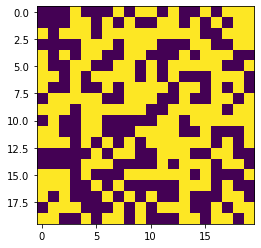

In [3]:
J = 1.0                    # spin.spin interaction strength in units of kT
N = 20                     # size of lattice, N x N (default=10)
config = initialstate(N)   # initialize randomized state
plt.imshow(config)         # plot initial state
print(config,config[-1,0])

In [4]:
NJs = 10
Js = np.linspace( 0.0, 2.0, num=NJs)
EvT = []                     # energy versus temperature
MvT = []                     # energy versus temperature
Nsteps = 4000       

for k in range(NJs):

    Ei = []                     # energy versus step index
    E = calcEnergy(J,config)      # initial quantum state energy
    Ei.append(E)

    Mi = []                     # energy versus step index
    M = calcMag(J,config)         # initial quantum state energy
    Mi.append(M)

    for m in range(Nsteps):

        i = np.random.randint(0,N) # choose spin to flip
        j = np.random.randint(0,N) 

        Eo = calcEnergy(Js[k],config)
        config[i,j] *= -1
        E = calcEnergy(Js[k],config)
    
        if np.random.random() > np.exp(-(E-Eo)): # if true reject move 
            config[i,j] *= -1   

        M = calcMag(Js[k],config)
        
        Ei.append(E)
        Mi.append(M)
    
    EvT.append(Ei[Nsteps])
    MvT.append(Mi[Nsteps])    

In [ ]:
# plot internal energy versus microstate step
plt.plot(Js,MvT)
plt.xlabel("dipole strength (kT)")
plt.ylabel("magnetization, M =Σs")

0.8888888888888888

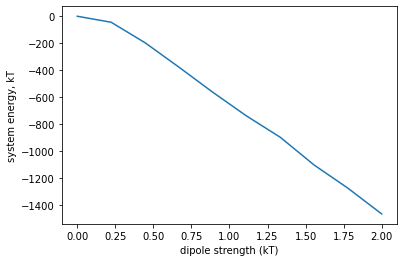

In [8]:
# plot internal energy versus microstate step
plt.plot(Js,EvT)
plt.xlabel("dipole strength (kT)")
plt.ylabel("system energy, kT")
Js[4]

In [ ]:
# plot internal energy versus microstate step
plt.plot(Mi)
plt.xlabel("step")
plt.ylabel("magnetization")

In [ ]:
plt.imshow(config)

In [ ]:
plt.hist(config, bins=20, range=(-2,2))
plt.xlabel("quantum number, n")
plt.ylabel("occupancy")